# Selección de características en modelos predictivos


In [1]:
import pandas
import numpy
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import svm
from sklearn import tree
import copy
import matplotlib
import matplotlib.pyplot as plt
import time

# Lectura de ficheros

In [2]:
#Aquí se produce la lectura de los datos de los dos ficheros de prueba

datosCancer = pandas.read_csv('BreastCancerDataset.csv', header=0,
                       names=['mean radius','mean texture','mean perimeter','mean area'
                              ,'mean smoothness','mean compactness','mean concavity'
                              ,'mean concave points','mean symmetry','mean fractal dimension'
                              ,'radius error','texture error','perimeter error','area error','smoothness error'
                              ,'compactness error','concavity error','concave points error','symmetry error'
                              ,'fractal dimension error','worst radius','worst texture','worst perimeter'
                              ,'worst area','worst smoothness','worst compactness','worst concavity'
                              ,'worst concave points','worst symmetry','worst fractal dimension','diagnosis'])
datosTitanic = pandas.read_csv('titanic.csv', header =0,
                               names = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Initial','Age_band','Family_Size','Alone','Fare_cat','Deck','Title','Is_Married','Survived'])                             


# Evaluación Robusta

In [3]:
def evaluacionRobusta (datos,variables,n_exp,cv=10,clf=tree.DecisionTreeClassifier(criterion='entropy'), scoring='balanced_accuracy'):

    i=0
    res =0.0
    prom =0.0

    data =datos.columns.values.tolist() 
    varia = datos[variables]                       #Obtenemos las variables predictoras
    obj = datos[data[len(data)-1]]                 #Obtenemos la variable objetivo
    while i < n_exp:
        i = i + 1
        scores = cross_val_score(
            clf, varia, obj, cv=cv, scoring=scoring)
        j=0
        while(j<len(scores)):
            res= scores[j] + res
            j=j+1
        prom= prom + res/len(scores) #Promediamos los resultados
        res=0.0

    return prom/n_exp

# Algoritmo SFS

In [4]:
def algoritmoSfs(datos, d=None, clf=tree.DecisionTreeClassifier(criterion='entropy'),scoring='balanced_accuracy',n_exp=10,cv=10):
    
    start_time = time.time()
    solucionActual=list()
    solucionTemporal=list()
    variableTemporal = list()
    k=0
    v = ''
    rendimientoTemporal = 0
    res = pandas.DataFrame(columns=['solution','score','size'])
    listaVariables = datos.columns.values.tolist()
    listaVariablesPredictorias = listaVariables[0:len(listaVariables)-1]
    
    if d==None:                         #Si no nos pasan la D como parámetro, la inicializamos a la cantidad de variables predictoras
        d = len(listaVariablesPredictorias)
        
    while k < d:
        i=0
        while i < len(listaVariablesPredictorias):
            v= listaVariables[i]
            if v not in solucionActual:
                solucionTemporal = copy.copy(solucionActual)
                solucionTemporal.append(v)
                rendimiento = evaluacionRobusta(datos,solucionTemporal,n_exp,cv,clf,scoring)            #Para este método necesitamos: (datos,variables,n_exp,cv,clf,scoring)
                if rendimiento > rendimientoTemporal:
                    rendimientoTemporal=rendimiento
                    variableTemporal = copy.copy(solucionTemporal)
            i = i + 1
        solucionActual = variableTemporal  #Actualizamos la solución actual con la nueva variable
        fila = pandas.Series(data={'solution':solucionActual, 'score':rendimientoTemporal, 'size':len(solucionActual)})
        res = res.append(fila, ignore_index=True)
        rendimientoTemporal = 0
        k = k + 1
        
    end_time = time.time()
    print("Tiempo de ejecución total = ", end_time - start_time, 'segundos')
    graficaAlgoritmos(res, 'sfs')
    return res.sort_values(by=['score'],ascending=False)

### Ejemplo de salida con parámetros óptimos para Titanic

Tiempo de ejecución total =  35.64417123794556 segundos


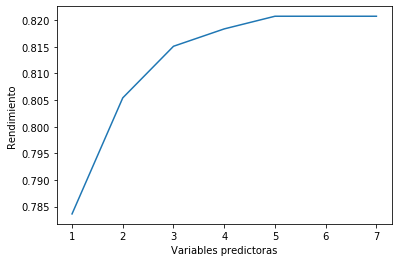

,solution,score,size
4,"[Initial, SibSp, Deck, Fare_cat, Title]",0.820749,5
5,"[Initial, SibSp, Deck, Fare_cat, Title, Sex]",0.820749,6
6,"[Initial, SibSp, Deck, Fare_cat, Title, Sex, I...",0.820749,7
3,"[Initial, SibSp, Deck, Fare_cat]",0.818371,4
2,"[Initial, SibSp, Deck]",0.815107,3
1,"[Initial, SibSp]",0.805416,2
0,[Initial],0.783611,1


In [22]:
algoritmoSfs(datosTitanic,d=7,n_exp=10,cv=6)

#algoritmoSfs (datos,d,clf,scoring, n_exp, cv)

#datos: conjunto de datos a evaluar                                              *Obligatorio*
#d: número de variables máximas a probar, por defecto, Todas las variables       *Opcional*
#clf: algoritmos de aprendizaje automático, por defecto, árbol de decisión       *Opcional*
#scoring: métrica de evaluación a usar, por defecto: balanced_accuracy           *Opcional*
#n_exp: número de experimentos para la validación cruzada, por defecto 10        *Opcional*
#cv:  Número de folds a considerar en la validación cruzada, por defecto 10      *Opcional*

#Como ejemplo, podemos llamar a este algoritmo (suponiendo que queremos pasar todos los datos) así: algoritmoSfs(datosTitanic, 10,tree.DecisionTreeClassifier('entropy'), 'balanced_accuracy', 3, 2)

### Ejemplo de salida con parámetros óptimos para Cáncer

Tiempo de ejecución total =  551.3221025466919 segundos


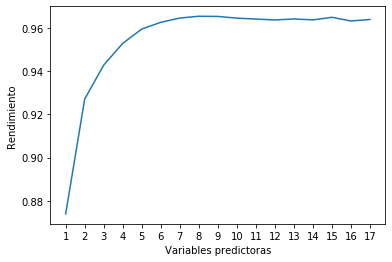

,solution,score,size
7,"[worst area, worst smoothness, mean texture, m...",0.965374,8
8,"[worst area, worst smoothness, mean texture, m...",0.965282,9
14,"[worst area, worst smoothness, mean texture, m...",0.964888,15
6,"[worst area, worst smoothness, mean texture, m...",0.964541,7
9,"[worst area, worst smoothness, mean texture, m...",0.964495,10
12,"[worst area, worst smoothness, mean texture, m...",0.964114,13
10,"[worst area, worst smoothness, mean texture, m...",0.964078,11
16,"[worst area, worst smoothness, mean texture, m...",0.963883,17
13,"[worst area, worst smoothness, mean texture, m...",0.963684,14
11,"[worst area, worst smoothness, mean texture, m...",0.963661,12


In [7]:
algoritmoSfs(datosCancer,d=17,n_exp=10,cv=12)

# Algoritmo SFFS


In [17]:
def algoritmoSffs(datos, umbral=10, clf=tree.DecisionTreeClassifier(criterion='entropy'),scoring='balanced_accuracy', n_exp=10, cv=10):
    start_time = time.time()
    solucionActual=list()
    anadidos= list()
    eliminados= list()
    eliminadosTemporal = ''
    k=0
    solucionTemporal=list()
    variableTemporal = list()
    r = ''
    v = ''
    anadir = ''
    rendimientoTemporal = 0
    rendimientoTemporal2 = 0
    res = pandas.DataFrame(columns=['solution','score','size'])
    listaVariables = datos.columns.values.tolist()
    listaVariablesPredictorias = listaVariables[0:len(listaVariables)-1]
    
    while k < umbral:
        if len(anadidos) != len(listaVariablesPredictorias):
            i=0
            rendimientoTemporal=0
            while i < len(listaVariablesPredictorias):
                v= listaVariables[i]
                if v not in solucionActual and v not in anadidos:
                    solucionTemporal = copy.copy(solucionActual)
                    solucionTemporal.append(v)
                    rendimiento = evaluacionRobusta(datos,solucionTemporal,n_exp,cv, clf,scoring)          #Para este método necesitamos mínimo : (datos,variables,n_exp,cv,clf,scoring)
                    if rendimiento > rendimientoTemporal:
                        rendimientoTemporal=rendimiento
                        variableTemporal = copy.copy(solucionTemporal)
                        anadir = v
                i = i + 1
            solucionActual =variableTemporal          #Actualizamos la solución actual con la nueva variable
            anadidos.append(anadir)
            rendimientoTemporal2 = copy.copy(rendimientoTemporal)      
        else:
            k = k + 1
        j=0
        while j < len(solucionActual):
            r = solucionActual[j]
            if r not in eliminados and len(solucionActual)>1:
                solucionTemporal = copy.copy(solucionActual)
                solucionTemporal.remove(r)
                rendimiento2 = evaluacionRobusta(datos,solucionTemporal,n_exp,cv, clf,scoring)             #Para este método necesitamos : (datos,variables,n_exp,cv,clf,scoring)
                if rendimiento2 > rendimientoTemporal2:     #Buscamos el mayor rendimiento
                    rendimientoTemporal2=rendimiento2
                    eliminadosTemporal = r              # Guardamos la variable con peor rendimiento
                    k=0
            j = j + 1   
        if rendimientoTemporal2>rendimientoTemporal:    #Comprobamos si aumenta el rendimiento tras eliminar la peor variable
            eliminados.append(eliminadosTemporal)
            solucionActual.remove(eliminadosTemporal)
            rendimientoTemporal = copy.copy(rendimientoTemporal2)    #Actualizamos el nuevo rendimiento
            fila = pandas.Series(data={'solution':solucionActual, 'score':rendimientoTemporal2, 'size':len(solucionActual)})
            k=0
        else:
            fila = pandas.Series(data={'solution':solucionActual, 'score':rendimientoTemporal, 'size':len(solucionActual)})    
        res = res.append(fila, ignore_index=True) 
    end_time = time.time()
    print("Tiempo de ejecución total = ", end_time - start_time, 'segundos')
    graficaAlgoritmos(res, 'sffs')
    return res.sort_values(by=['score'],ascending=False)



### Ejemplo de salida con parámetros óptimos para Cáncer

Tiempo de ejecución total =  526.9372696876526 segundos


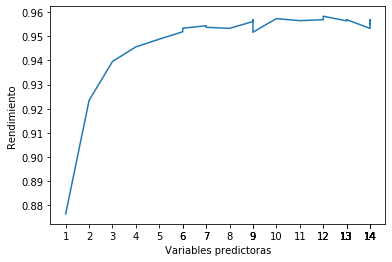

,solution,score,size
16,"[worst concave points, worst area, worst fract...",0.958272,12
13,"[worst concave points, worst area, worst fract...",0.957293,10
17,"[worst concave points, worst area, worst fract...",0.956876,13
12,"[worst concave points, worst area, worst fract...",0.956874,9
19,"[worst concave points, worst area, worst fract...",0.956834,14
15,"[worst concave points, worst area, worst fract...",0.956833,12
24,"[worst concave points, worst area, mean radius...",0.956657,14
22,"[worst concave points, worst area, worst fract...",0.956568,14
14,"[worst concave points, worst area, worst fract...",0.956452,11
18,"[worst concave points, worst area, worst fract...",0.956364,13


In [19]:
algoritmoSffs(datosCancer,umbral=10,n_exp=10,cv=6)

#algoritmoSffs (datos,umbral,clf,scoring, n_exp, cv)

#datos: conjunto de datos a evaluar                                                                       *Obligatorio*
#umbral: número de repeticiones sin eliminar ninguna variable para considerar finalizado el algoritmo     *Opcional*
#clf: algoritmos de aprendizaje automático, por defecto, árbol de decisión                                *Opcional*
#scoring: métrica de evaluación a usar, por defecto: balanced_accuracy                                    *Opcional*
#n_exp: número de experimentos para la validación cruzada, por defecto 10                                 *Opcional*
#cv:  número de folds a considerar en la validación cruzada, por defecto 10                               *Opcional*

#Como ejemplo, podemos llamar a este algoritmo (suponiendo que queremos pasar todos los datos) así: algoritmoSffs(datosTitanic, 10,tree.DecisionTreeClassifier('entropy'), 'balanced_accuracy', 3, 2)

### Ejemplo de salida con parámetros óptimos para Titanic

Tiempo de ejecución total =  122.21636247634888 segundos


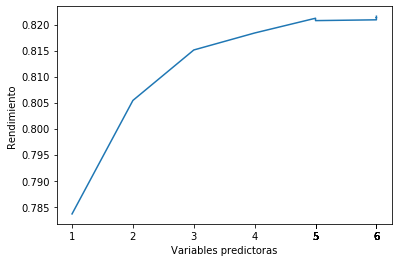

,solution,score,size
12,"[SibSp, Deck, Fare_cat, Title, Sex, Is_Married]",0.821588,6
6,"[SibSp, Deck, Fare_cat, Title, Sex, Is_Married]",0.821359,6
13,"[SibSp, Deck, Fare_cat, Title, Sex, Is_Married]",0.821283,6
15,"[SibSp, Deck, Fare_cat, Title, Sex]",0.821207,5
24,"[SibSp, Deck, Fare_cat, Title, Sex]",0.821207,5
23,"[SibSp, Deck, Fare_cat, Title, Sex]",0.821207,5
22,"[SibSp, Deck, Fare_cat, Title, Sex]",0.821207,5
21,"[SibSp, Deck, Fare_cat, Title, Sex]",0.821207,5
20,"[SibSp, Deck, Fare_cat, Title, Sex]",0.821207,5
19,"[SibSp, Deck, Fare_cat, Title, Sex]",0.821207,5


In [20]:
algoritmoSffs(datosTitanic,umbral=10,n_exp=12,cv=6)

# Gráficas

In [6]:
def graficaAlgoritmos(data, alg):

    plt.xlabel('Variables predictoras')
    plt.ylabel('Rendimiento')

    if alg == 'sfs':
        y = data.sort_values(by=['size'],ascending=True)
        tam = len(list(data['size']))
        plt.plot(numpy.arange(1,tam+1),list(y['score']))
        plt.xticks(numpy.arange(1,tam+1))
    else:
        if alg == 'sffs':
            y = data.sort_values(by=['size'],ascending=True)
            plt.plot(list(y['size']),list(y['score']))
            plt.xticks(list(y['size']))
        else:
            print('El algoritmo', alg,  'que desea dibujar no es correcto. Compruebe que está bien escrito acorde a los comentarios aportados')

    return plt.show()